# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
df= pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

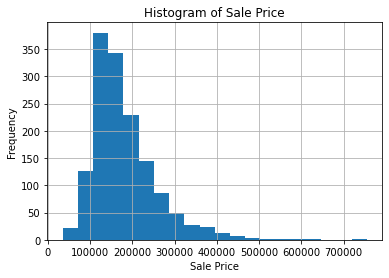

In [8]:
# Plot the histogram
df['SalePrice'].hist(bins=20)  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')

# Display the plot
plt.show()


Now, print out the mean, median, and standard deviation:

In [9]:

# Calculate mean, median, and standard deviation
mean_sale_price = df['SalePrice'].mean()
median_sale_price = df['SalePrice'].median()
std_sale_price = df['SalePrice'].std()

# Print the results
print(f"Mean Sale Price: {mean_sale_price}")
print(f"Median Sale Price: {median_sale_price}")
print(f"Standard Deviation of Sale Price: {std_sale_price}")


Mean Sale Price: 180921.19589041095
Median Sale Price: 163000.0
Standard Deviation of Sale Price: 79442.50288288662


In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
#interpretting the mean, median and standard deviation of the above data
"""
Mean sale price reperesnts the central tendancy of data, in this case on average the sale price for a house is $180,921.196
Median sale price reperesents the middle value of the column data in saleprice in this case it means half of the houses were sold above $163,000 and half of the houses were sold below $163,000
Standard deviation measures the dispersion how far away a data point is further from the mean value, in this case teh salesprice varies by $79,442.50 from the mean
"""

'\nMean sale price reperesnts the centarl tendancy of data, in this case on average the sale price for a house is $180,921.196\nMedian sale price reperesents the middle value of the column data in saleprice in this case it means half of the houses were sold above $163,000 and half of the houses were sold below $163,000\nStandard deviation measures the dispersion how far away a data point is further from the mean value, in this case teh salesprice varies by $79,442.50 from the mean\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

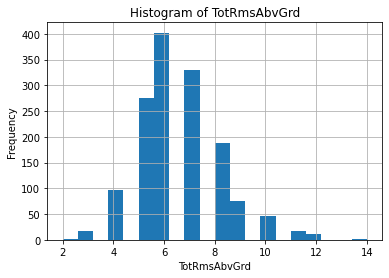

In [12]:
# Plot the histogram
df['TotRmsAbvGrd'].hist(bins=20)  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
plt.title('Histogram of TotRmsAbvGrd')

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [14]:

# Calculate mean, median, and standard deviation
mean_TotRmsAbvGrd = df['TotRmsAbvGrd'].mean()
median_TotRmsAbvGrd = df['TotRmsAbvGrd'].median()
std_TotRmsAbvGrd = df['TotRmsAbvGrd'].std()

# Print the results
print(f"Mean TotRmsAbvGrd: {mean_TotRmsAbvGrd}")
print(f"Median TotRmsAbvGrd: {median_TotRmsAbvGrd}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_TotRmsAbvGrd}")

Mean TotRmsAbvGrd: 6.517808219178082
Median TotRmsAbvGrd: 6.0
Standard Deviation of TotRmsAbvGrd: 1.6253932905840505


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
Mean TotRmsAbvGrd reperesnts the central tendancy of the column data, in the TotRMsAbvGrd the average is 6
Median TotRmsAbvGrd reperesents the middle value of the column data in this case 6, all other values half are below 6 and half are above 6
Standard deviation measures the dispersion how far away a data point is further from the mean value, it is 1, this shows more consistency with the values because it is low

"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

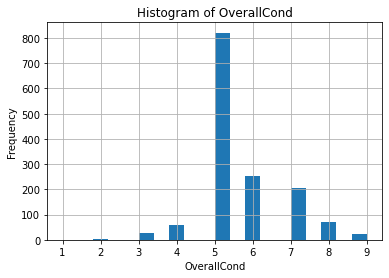

In [15]:
# Plot the histogram
df['OverallCond'].hist(bins=20)  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.title('Histogram of OverallCond')

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [16]:

# Calculate mean, median, and standard deviation
mean_OverallCond = df['OverallCond'].mean()
median_OverallCond = df['OverallCond'].median()
std_OverallCond = df['OverallCond'].std()

# Print the results
print(f"Mean OverallCond: {mean_OverallCond}")
print(f"Median OverallCond: {median_OverallCond}")
print(f"Standard Deviation of OverallCond: {std_OverallCond}")

Mean OverallCond: 5.575342465753424
Median OverallCond: 5.0
Standard Deviation of OverallCond: 1.1127993367127316


In the cell below, interpret the above information.

In [17]:
# Replace None with appropriate text
"""
Mean OverallCond reperesnts the central tendancy of data in the column OvearallCond in the data for OverallCond the average is 5.6
MedianOverallCond reperesents the middle value of the column data in OverallCond in this case the middle value is 5 
Standard deviation measures the dispersion how far away a data point is further from the mean value, 1 is a low value, this means the data points are consistent that is not far apart

"""

'\nMean OverallCond reperesnts the central tendancy of data in the column OvearallCond in the data for OverallCond the average is 5.6\nMedianOverallCond reperesents the middle value of the column data in OverallCond in this case the middle value is 5 \nStandard deviation measures the dispersion how far away a data point is further from the mean value, 1 is a low value, this means the data points are consistent that is not far apart\n\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [18]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [19]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

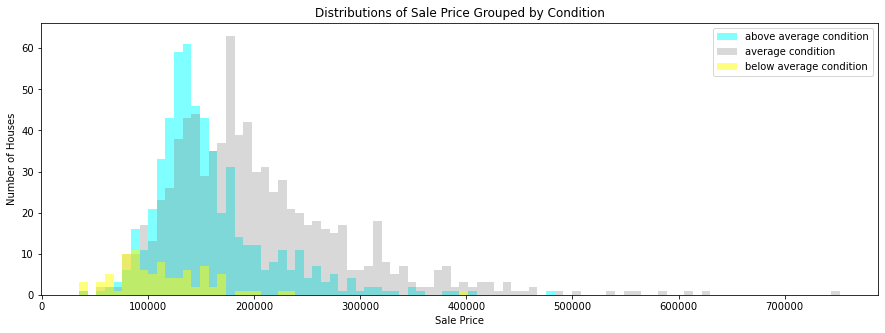

In [20]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [37]:
# Replace None with appropriate text
"""
- The plot shows three histograms representing different subsets of the data based on the condition of the houses: 'above average condition', 'average condition', and 'below average condition'. Each histogram represents the distribution of sale prices within each subset.

- The x-axis represents the 'Sale Price', indicating the range of prices. The y-axis represents the 'Number of Houses', indicating the count of houses in each price range.

- The histograms are plotted with reduced opacity (alpha) to allow for overlapping and comparison between the subsets. The transparency of the histograms helps visualize the relative density of the sale prices for each condition group.

- The color-coded bars represent the different condition groups. In this case, 'above average condition' is shown in cyan, 'average condition' in gray, and 'below average condition' in yellow.

- The plot's title is "Distributions of Sale Price Grouped by Condition". It provides an overall description of what the graph displays.

- The x-axis label is "Sale Price", indicating the variable being represented on the x-axis.

- The y-axis label is "Number of Houses", indicating the variable being represented on the y-axis.

- The legend displays the labels for each condition group, allowing easy identification of the corresponding histograms..
"""

'\n- The plot shows three histograms representing different subsets of the data based on the condition of the houses: \'above average condition\', \'average condition\', and \'below average condition\'. Each histogram represents the distribution of sale prices within each subset.\n\n- The x-axis represents the \'Sale Price\', indicating the range of prices. The y-axis represents the \'Number of Houses\', indicating the count of houses in each price range.\n\n- The histograms are plotted with reduced opacity (alpha) to allow for overlapping and comparison between the subsets. The transparency of the histograms helps visualize the relative density of the sale prices for each condition group.\n\n- The color-coded bars represent the different condition groups. In this case, \'above average condition\' is shown in cyan, \'average condition\' in gray, and \'below average condition\' in yellow.\n\n- The plot\'s title is "Distributions of Sale Price Grouped by Condition". It provides an overal

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [21]:

# Calculate Pearson correlation coefficients
correlations = df.corr()['SalePrice']

# Find the column with the highest positive correlation (excluding 'SalePrice')
highest_corr_column = correlations[correlations != 1].idxmax()
highest_corr_value = correlations[highest_corr_column]

# Print the results
print(f"The column most positively correlated with 'SalePrice' is '{highest_corr_column}'.")
print(f"Pearson correlation coefficient: {highest_corr_value:.4f}")


The column most positively correlated with 'SalePrice' is 'OverallQual'.
Pearson correlation coefficient: 0.7910


Now, find the ***most negatively correlated*** column:

In [32]:
# Calculate correlations with 'SalePrice'
correlations = df.corr()['SalePrice']

# Find the most negatively correlated column (excluding 'SalePrice' itself)
negative_corr_columns = correlations[correlations < 1].sort_values()

# Get the name and correlation value of the most negatively correlated column
most_negative_corr_column = negative_corr_columns.idxmin()
most_negative_corr_value = negative_corr_columns.min()

# Print the result
print(f"Most negatively correlated column (other than 'SalePrice'): {most_negative_corr_column}")
print(f"Pearson correlation with 'SalePrice': {most_negative_corr_value}")

Most negatively correlated column (other than 'SalePrice'): KitchenAbvGr
Pearson correlation with 'SalePrice': -0.1359073708421417


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

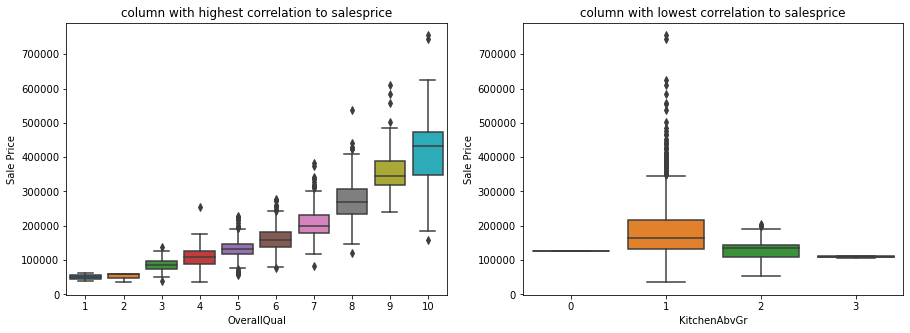

In [33]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("column with highest correlation to salesprice")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("column with lowest correlation to salesprice")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [41]:
# Replace None with appropriate text
"""
The side-by-side boxplot visualization compares the distribution of the 'SalePrice' variable across different values of two columns: 'OverallQual' and 'KitchenAbvGr'. Here's an interpretation of the graph:

- The graph consists of two subplots displayed side by side, each representing a different column's relationship with the 'SalePrice'.

- The left subplot represents the column with the highest correlation to 'SalePrice' ('OverallQual'), while the right subplot represents the column with the lowest correlation ('KitchenAbvGr').

- For each subplot, a boxplot is created to display the distribution of 'SalePrice' for different values of the respective column.

- The x-axis represents the values of the corresponding column ('OverallQual' or 'KitchenAbvGr'), and the y-axis represents the 'SalePrice' variable.

- The boxplot visualizes the distribution of 'SalePrice' for each value of the column. It displays the median, quartiles, and any potential outliers in the data.

- The left subplot's title is "Column with the highest correlation to SalePrice". It indicates that the plot represents the relationship between 'OverallQual' and 'SalePrice'.

- The left subplot's x-axis label is "OverallQual", indicating the variable being represented on the x-axis.

- The left subplot's y-axis label is "Sale Price", indicating the variable being represented on the y-axis.

- The right subplot's title is "Column with the lowest correlation to SalePrice". It indicates that the plot represents the relationship between 'KitchenAbvGr' and 'SalePrice'.

- The right subplot's x-axis label is "KitchenAbvGr", indicating the variable being represented on the x-axis.

- The right subplot's y-axis label is "Sale Price", indicating the variable being represented on the y-axis.

The boxplot visualization allows for a comparison of the distribution of 'SalePrice' across different values of the two columns. It provides insights into how the values of these columns may impact the sale prices and identifies any potential trends or differences in the distribution.
"""

'\nThe side-by-side boxplot visualization compares the distribution of the \'SalePrice\' variable across different values of two columns: \'OverallQual\' and \'KitchenAbvGr\'. Here\'s an interpretation of the graph:\n\n- The graph consists of two subplots displayed side by side, each representing a different column\'s relationship with the \'SalePrice\'.\n\n- The left subplot represents the column with the highest correlation to \'SalePrice\' (\'OverallQual\'), while the right subplot represents the column with the lowest correlation (\'KitchenAbvGr\').\n\n- For each subplot, a boxplot is created to display the distribution of \'SalePrice\' for different values of the respective column.\n\n- The x-axis represents the values of the corresponding column (\'OverallQual\' or \'KitchenAbvGr\'), and the y-axis represents the \'SalePrice\' variable.\n\n- The boxplot visualizes the distribution of \'SalePrice\' for each value of the column. It displays the median, quartiles, and any potential 

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [34]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

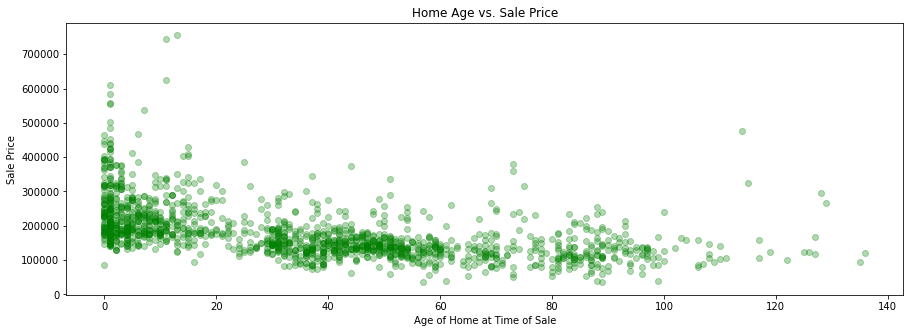

In [35]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [40]:
# Replace None with appropriate text
"""
This scatter plot to visualizes the relationship between the age of homes and their corresponding sale prices.

- The scatter plot represents the relationship between the 'Age' of homes and their 'SalePrice'.

- The x-axis represents the "Age of Home at Time of Sale". It indicates the number of years between the year the home was sold ('YrSold') and the year it was built ('YearBuilt').

- The y-axis represents the "Sale Price" of the homes. It indicates the price at which the homes were sold.

- Each data point in the scatter plot represents an individual home, positioned based on its age and sale price.

- The transparency (alpha) of the data points is set to 0.3, allowing for better visualization of overlapping points.

- The color of the data points is set to green.

- The plot's title is "Home Age vs. Sale Price", indicating the relationship being explored.

- The x-axis label is "Age of Home at Time of Sale", describing the variable being represented on the x-axis.

- The y-axis label is "Sale Price", describing the variable being represented on the y-axis.

The scatter plot visualizes the distribution of sale prices for homes at different ages. It helps identify any trends or patterns in the relationship between the age of homes and their sale prices. For example, it may reveal whether older homes tend to have lower sale prices or if there are any significant outliers in the data.
"""

'\nThis scatter plot to visualizes the relationship between the age of homes and their corresponding sale prices.\n\n- The scatter plot represents the relationship between the \'Age\' of homes and their \'SalePrice\'.\n\n- The x-axis represents the "Age of Home at Time of Sale". It indicates the number of years between the year the home was sold (\'YrSold\') and the year it was built (\'YearBuilt\').\n\n- The y-axis represents the "Sale Price" of the homes. It indicates the price at which the homes were sold.\n\n- Each data point in the scatter plot represents an individual home, positioned based on its age and sale price.\n\n- The transparency (alpha) of the data points is set to 0.3, allowing for better visualization of overlapping points.\n\n- The color of the data points is set to green.\n\n- The plot\'s title is "Home Age vs. Sale Price", indicating the relationship being explored.\n\n- The x-axis label is "Age of Home at Time of Sale", describing the variable being represented on

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.